# Übung 2
## Aufgabe 1: Canny
Implementiere den Canny-Edge-Detector, wie in der Vorlesung beschrieben. Grober Plan:

1. Bild weichzeichnen
2. Sobel-Operator anwenden
3. Non-Maximum-Suppression
4. Hysterese

### Vorvorarbeitung
Glätte das Bild mit einem Gaussian (beachte: wir werden später an den Parametern drehen). Dann erzeuge mittels Sobel-Operator die Matrizen für Gradientenmagnitude und Gradientenrichtung. Die Einträge der letzteren Matrix kannst Du hier gleich auf die 4 Richtungen (für die 8 Nachbarn) setzen. Plotte beide Zwischenergebnisse!

edges_x:


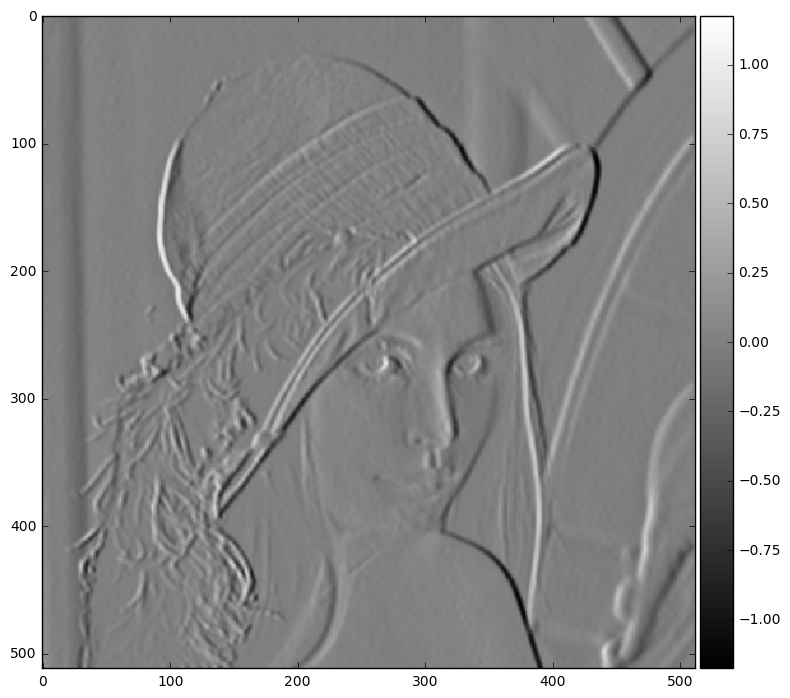

edges_y:


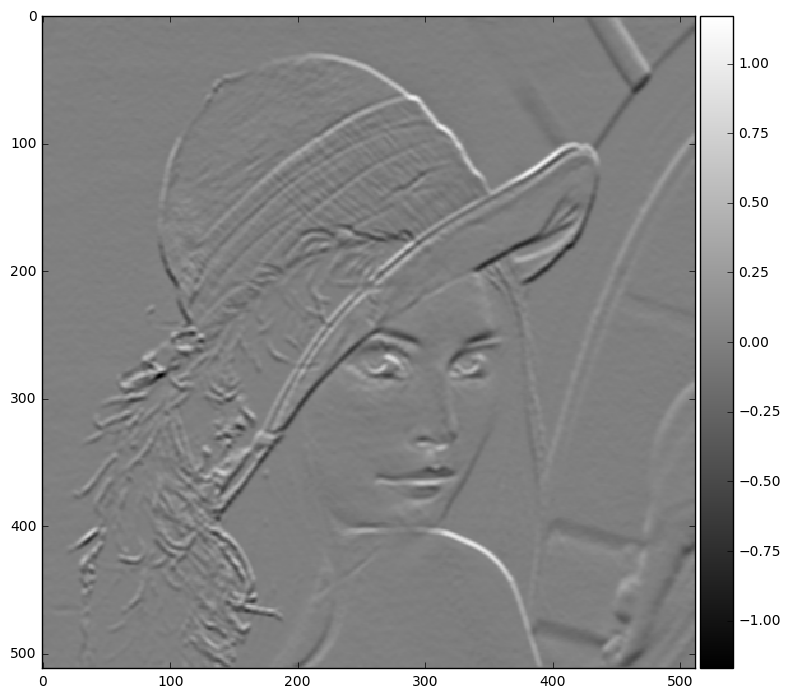

edgeDir:


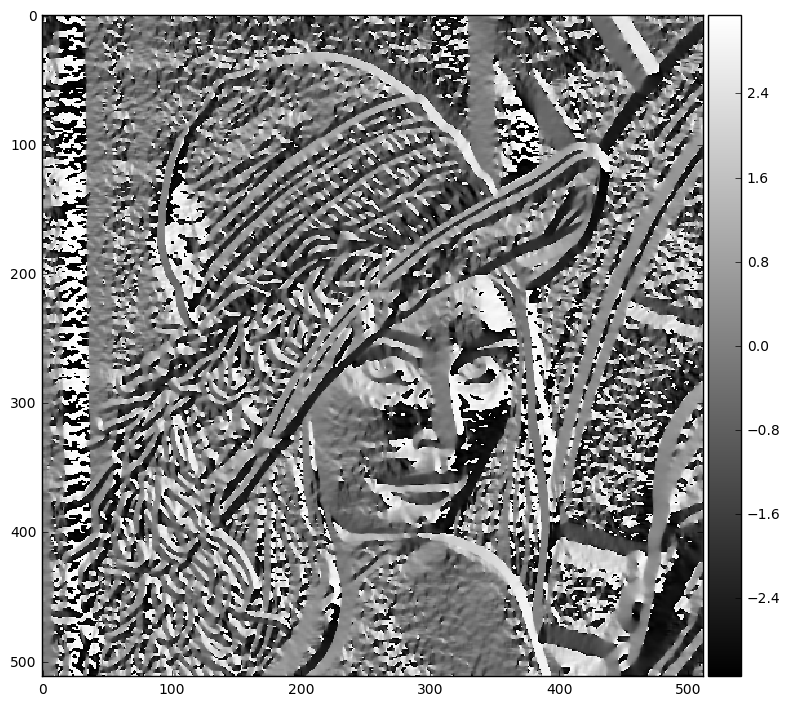

rounded edgeDir:


/Users/hubur/anaconda2/envs/python3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


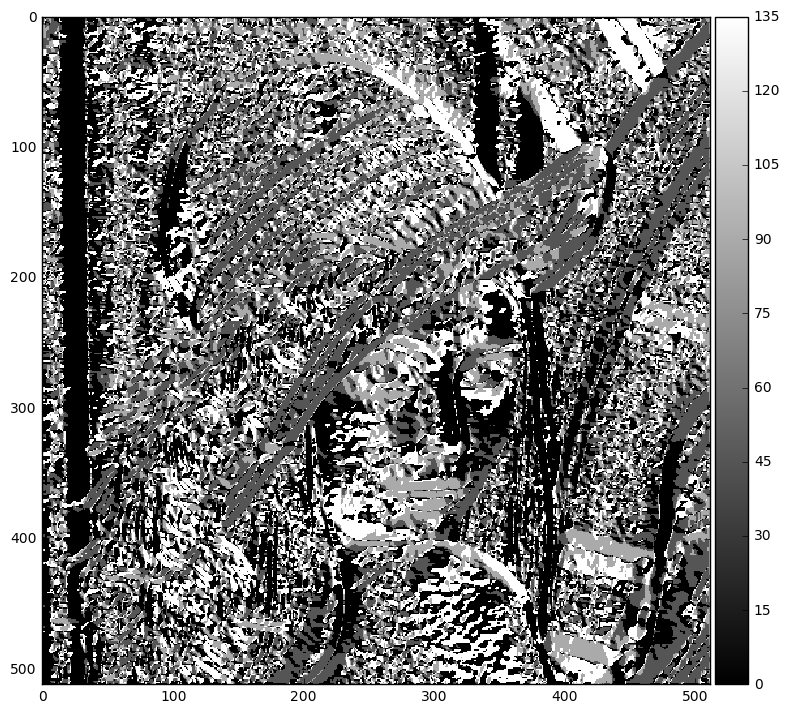

magnitude:


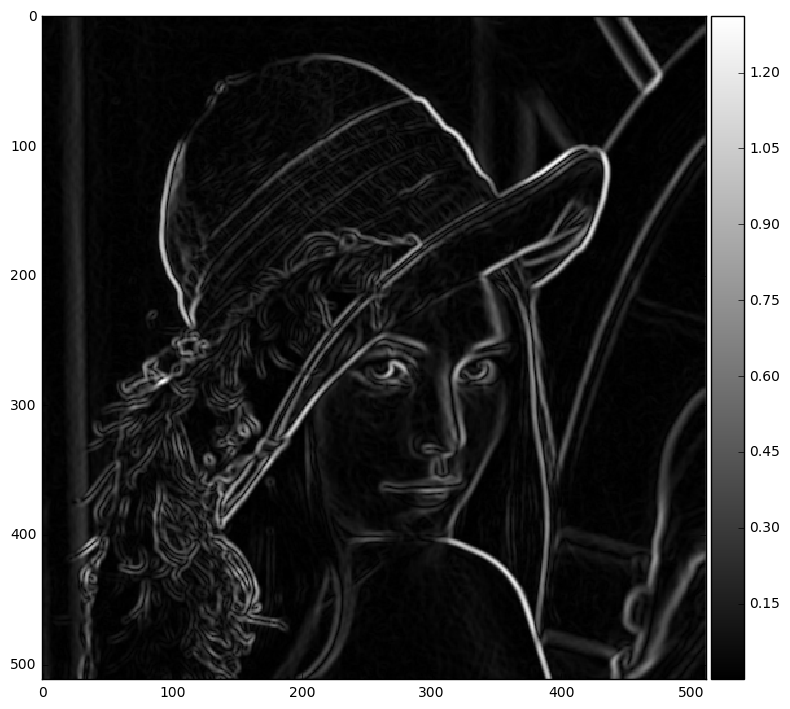

In [153]:
%matplotlib inline

from skimage import io, data, color
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage


# create gauss matrix for filtering
def gauss_mat(size, sigma):
    x = np.arange(0, size, 1, float)
    y = x[:, np.newaxis]
    x0 = y0 = size // 2
    mat=np.exp(-0.5*(((x-x0)/sigma)**2
                     +((y-y0)/sigma)**2))/(2*np.pi*sigma**2)
    return mat / mat.sum()


def plot(img):
    plt.figure(figsize = (8,8), dpi = 64)
    io.imshow(img, cmap="gray",interpolation = "none")
    plt.show()


# rounding
def round_dir_matrix(a):
    a += (a < 0) * np.pi
    t1 = (1 / 8.) * np.pi
    t2 = (3 / 8.) * np.pi
    t3 = (5 / 8.) * np.pi
    t4 = (7 / 8.) * np.pi
    a[((a <  t1) | (a >=t4))] = 0
    a[((a >= t1) & (a < t2))] = 45
    a[((a >= t2) & (a < t3))] = 90
    a[((a >= t3) & (a < t4))] = 135
    return a


image = color.rgb2gray(io.imread('images/lena.png'))

# blur
gk = gauss_mat(5, 2)
img1 = ndimage.convolve(image, gk)

# sobel filter edge detection
sx = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sy = sx.transpose()

edges_x = ndimage.convolve(img1, sx)
print("edges_x:")

plot(edges_x)

edges_y = ndimage.convolve(img1, sy)
print("edges_y:")
plot(edges_y)

# edge directions
edgeDir = np.arctan2(edges_y, edges_x)

print("edgeDir:")
plot(edgeDir)

# rounding to 0, 45, 90, 135
round_dir_matrix(edgeDir)

print("rounded edgeDir:")
plot(edgeDir)

# magnitude
mag = np.hypot(edges_x, edges_y)
print("magnitude:")
plot(mag)

### Non-Maximum Suppression
Implementiere die Non-Maximum-Suppression, wie in der Vorlesung beschrieben. Ziehe das Ergebnis vom Gradientenmagnitudenbild ab und zeige das Ergebnis!

/Users/hubur/anaconda2/envs/python3/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


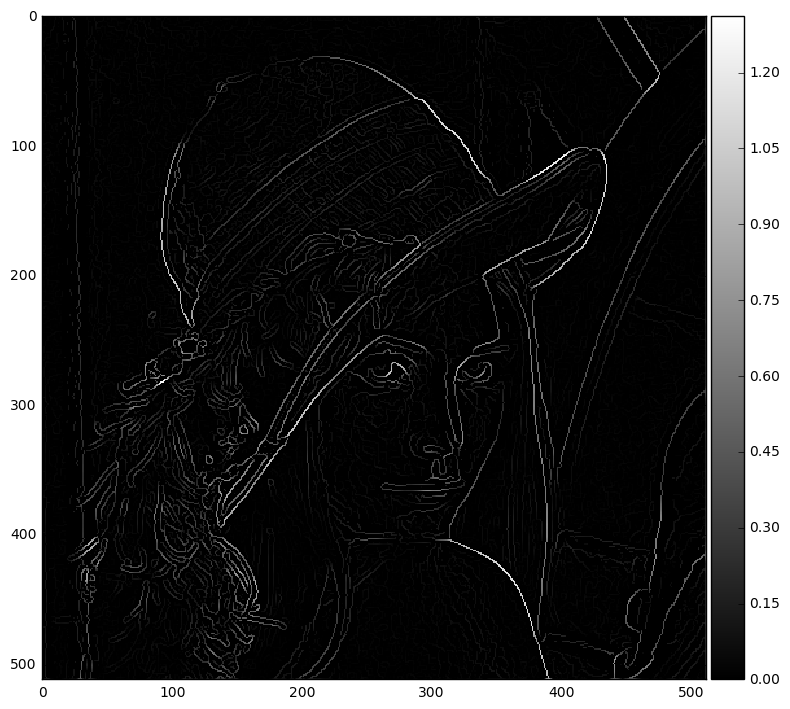

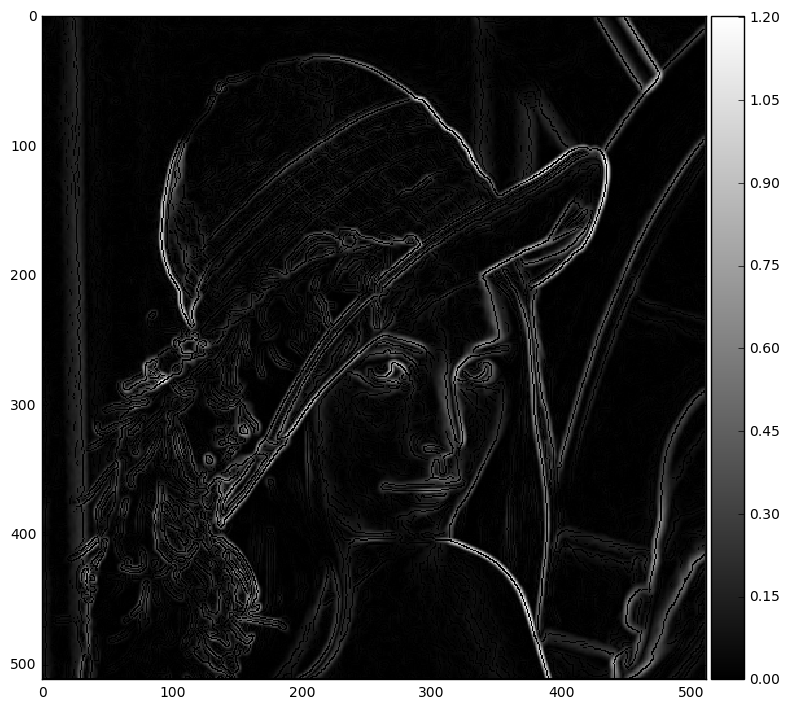

In [157]:
# non-maximum-suppression
mag_thin = np.copy(mag)
width, height = image.shape

for x in range(1, width - 1):
    for y in range(1, height - 1):
        if edgeDir[x][y] == 90:
            if mag[x][y]<mag[x+1][y]or mag[x][y]<mag[x-1][y]:
                mag_thin[x][y] = 0
        elif edgeDir[x][y] == 135:
            if mag[x][y]<mag[x+1][y-1]or mag[x][y]<mag[x-1][y+1]:
                mag_thin[x][y] = 0
        elif edgeDir[x][y] == 0:
            if mag[x][y]<mag[x][y+1]or mag[x][y]<mag[x][y-1]:
                mag_thin[x][y] = 0
        else:
            if mag[x][y]<mag[x+1][y+1]or mag[x][y]<mag[x-1][y-1]:
                mag_thin[x][y] = 0

plot(mag_thin)
plot(mag - mag_thin)

### Hysterese
Implementiere das Kantentracing, wie in der Vorlesung beschrieben und zeige das Endergebnis für drei verschiedene Schwellwertpaare: zwei niedrige Schwellwerte (z.B. 20 und 50), hohe Schwellwerte (z.B. 80 und 120) und Schwellwerte mit großem Abstand (z.B. 40 und 140).

low_threshold: 20, high_threshold: 50


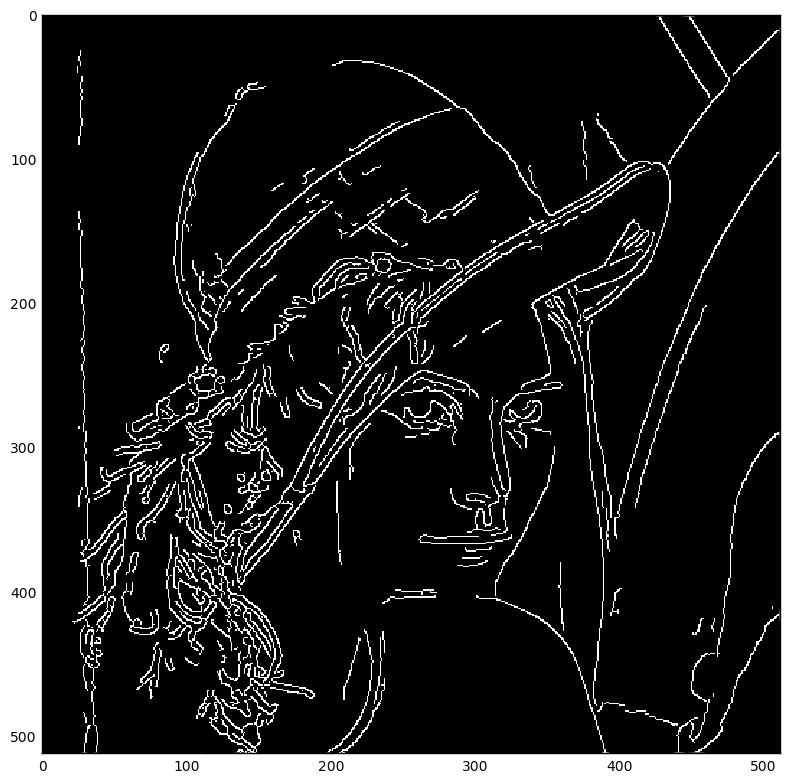

low_threshold: 80, high_threshold: 120


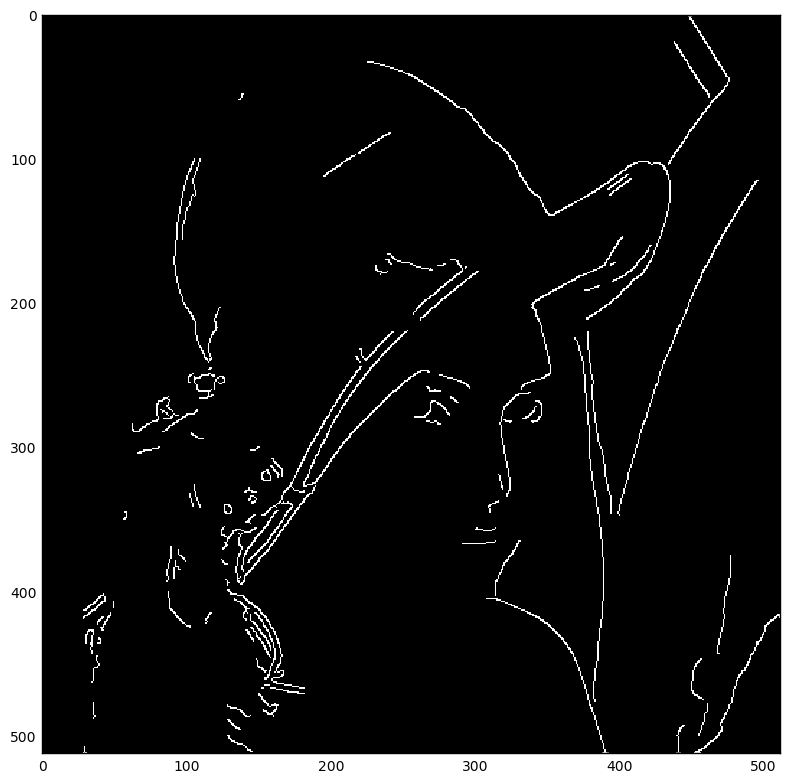

low_threshold: 40, high_threshold: 140


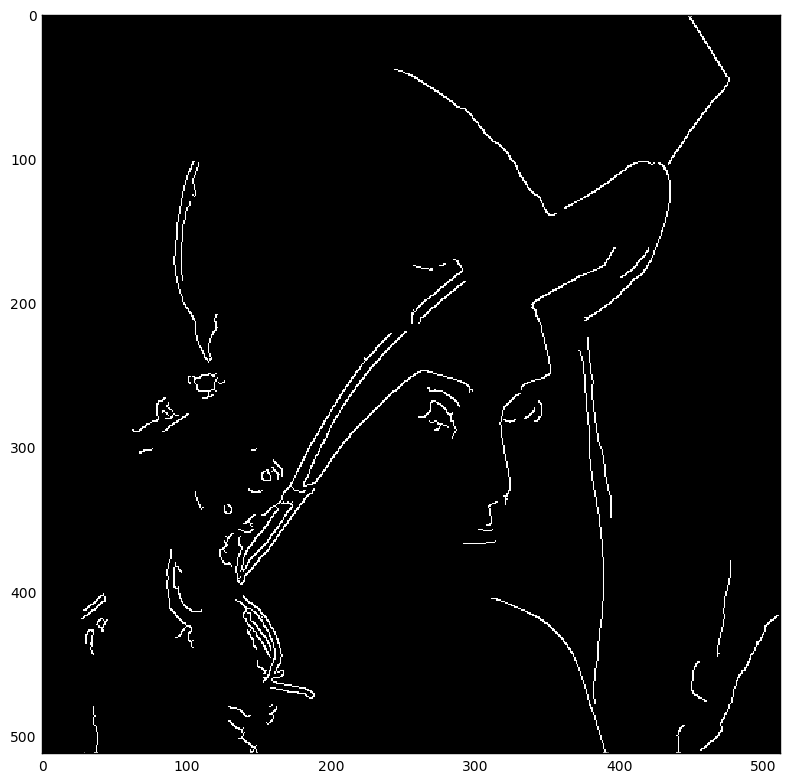

In [155]:
# hysteresis
def hysteresis(low_threshold,high_threshold):
    print("low_threshold: {}, high_threshold: {}"
          .format(low_threshold,high_threshold))
    low_threshold /= 256.
    high_threshold /= 256.
    strong = np.zeros((width, height))
    weak = np.zeros((width, height))

    for x in range(width):
        for y in range(height):
            if mag_thin[x][y] >= high_threshold:
                strong[x][y] = mag_thin[x][y]
            elif mag_thin[x][y] >= low_threshold:
                weak[x][y] = mag_thin[x][y]

    for x in range(1, width - 1):
        for y in range(1, height - 1):
            if strong[x][y]:
                check_neighbors(x, y, strong, weak)
    return strong


def check_neighbors(x, y, strong, weak):
    strong[x][y] = 1
    x_offset = [-1, 0, 1, -1, 1, -1, 0, 1]
    y_offset = [-1, -1, -1, 0, 0, 1, 1, 1]
    for i in range(8):
        if weak[x + x_offset[i]][y + y_offset[i]] != 0:
            strong[x + x_offset[i]][y + y_offset[i]] = 1

plot(hysteresis(20, 50))
plot(hysteresis(80, 120))
plot(hysteresis(40, 140))